<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler


In [2]:
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col=['date'])

display(data_train.head())
data_train.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_cleaner.i

In [3]:
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col=['date'])

display(data_full.head())
data_full.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_cleaner.i

In [4]:
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col=['date'])

display(data_test.head())
data_test.info()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                         529

Посмотрим на типы данных. Все типы данных корректные, дата является индексом.

Рассчитаем эффективность

In [5]:
efficiency = ((data_train['rougher.output.concentrate_au']*
                            (data_train['rougher.input.feed_au']- 
                             data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*
                                                                   (data_train['rougher.output.concentrate_au'] -
                                                                    data_train['rougher.output.tail_au'] )))*100
display(efficiency.head())


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
dtype: float64

Вычислим MAE и отдельно выведем средние значения обоих показателей


In [6]:
print(mean_absolute_error(data_train['rougher.output.recovery'], efficiency))

print('Среднее значение эффективности в датасете', data_train['rougher.output.recovery'].mean())
print('Среднее значение эффективности в датасете', efficiency.mean())

9.682896147825551e-15
Среднее значение эффективности в датасете 82.70450164550293
Среднее значение эффективности в датасете 82.70450164550293


MAE показывает разницу, но средние значения идентичны, а значит разница скорее всего обусловлена наличием пропусков в данных

Заполним пропуски методом interpolate()

In [7]:
data_train = data_train.interpolate()
data_train.info()
data_full = data_full.interpolate()
data_test = data_test.interpolate()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant                      14149 non-null float64
primary_cleaner.i

Сравним тренировочную и тестовую выборки:


In [8]:

print('Размер обучающей выборки: {} '.format(data_train.shape))
print('Размер тестовой выборки: {} '.format(data_test.shape))
columns_train = data_train.columns.values.tolist()
columns_test = data_test.columns.values.tolist()
differences = list(set(columns_train) - set(columns_test))
display(differences)

data_train = data_train.drop(differences, axis=1)
print('Размер обучающей выборки: {} '.format(data_train.shape))
print('Размер тестовой выборки: {} '.format(data_test.shape))


Размер обучающей выборки: (14149, 86) 
Размер тестовой выборки: (5290, 52) 


['primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_au',
 'rougher.output.concentrate_ag',
 'rougher.output.tail_au',
 'final.output.tail_ag',
 'final.output.concentrate_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_pb',
 'rougher.output.concentrate_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.tail_sol',
 'rougher.output.tail_ag',
 'rougher.output.concentrate_au',
 'final.output.concentrate_sol',
 'primary_cleaner.output.concentrate_sol',

Размер обучающей выборки: (14149, 52) 
Размер тестовой выборки: (5290, 52) 


В тестовой выборке нет данных output и калькуляций веществ, так как нам это не потребуется при обучении модели. Мы убрали соответствующие столбцы и в обучающей выборке, чтобы размер данных для обучения и теста был одинаковый.

Проверим датасеты на дубликаты:

In [9]:
duplicates_train = data_train[data_train.duplicated()]
display(duplicates_train)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


In [10]:
duplicates_test = data_test[data_test.duplicated()]
display(duplicates_test)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


In [11]:
duplicates_full= data_full[data_full.duplicated()]
display(duplicates_full)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


Видим, что дубликатов нет.

### Вывод:
Были загружены три датасета, содержащие общие данные и данные для обучающей и тестовой выборок. Была проверена корректность расчета эффективности, и доказано, что она рассчитана верно. После первичного осмотра датасетов были найдено, что они содержат пропуски.  Было решено заполнить их методом интерполяции, на основе данных предыдущей и последующей ячейки. Типаы данных корректны, данные, содержащие время, назначены индексом.

В тестовой выборке отсутствовали данные, обозначающие результат обработки(output) и расчеты концентраций металлов. Эти признаки не нужны для обучения моделей.
В обучающей выборке были удалены данные, отсутствующие в тестовой, чтобы привести выборки в соответствие.
Данные были проверены на дубликаты, их в датасетах не выявлено.


## Анализ данных

Посмотрим на распределение металлов на разных стадиях очистки

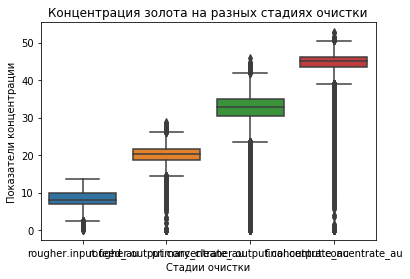

In [12]:
gold_spreading = data_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
sns.boxplot(x="variable", y="value", data=pd.melt(gold_spreading))
sns.set(rc={'figure.figsize':(18,4)})
plt.title("Концентрация золота на разных стадиях очистки")
plt.xlabel("Стадии очистки")
plt.ylabel("Показатели концентрации")
plt.show()



На графике, показывающей концентрацию золота на различных стадиях, мы видим, что концентрация золота постепенно растет и достигает максимального значения к финальному этапу очистки. Однако с каждым этапом растет и количество выбросных результатов. Можем предположить, что возможно, это связано с неправильной работой оборудования или поломкой.

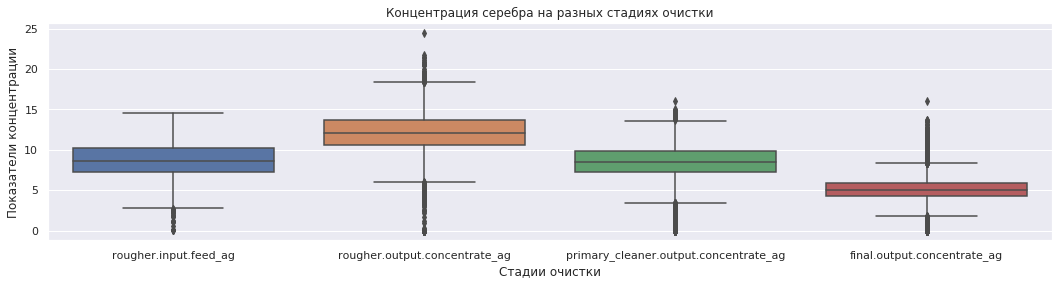

In [13]:
ag_spreading = data_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
sns.boxplot(x="variable", y="value", data=pd.melt(ag_spreading))
sns.set(rc={'figure.figsize':(18,5)})
plt.title("Концентрация серебра на разных стадиях очистки")
plt.xlabel("Стадии очистки")
plt.ylabel("Показатели концентрации")
plt.show()



На графике, показывающей концентрацию серебра на различных стадиях, мы видим, что концентрация серебра достигает максимального значения после флотации, а потом концентрация начинает уменьшаться и к финальному этапу очистки концентрация серебра минимальна. Также на графике есть и выбросные значения.

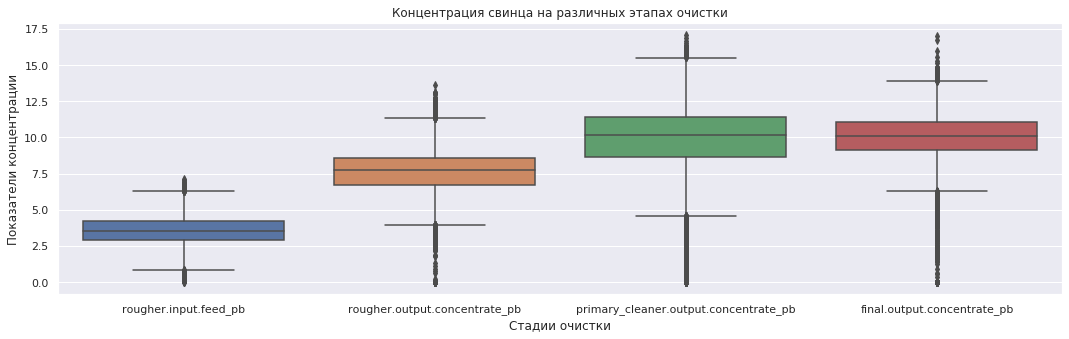

In [14]:
pb_spreading = data_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
sns.boxplot(x="variable", y="value", data=pd.melt(pb_spreading))
sns.set(rc={'figure.figsize':(18,5)})
plt.title("Концентрация свинца на различных этапах очистки")
plt.xlabel("Стадии очистки")
plt.ylabel("Показатели концентрации")
plt.show()



На графике, показывающем концентрацию свинца на различных стадиях, мы видим, что концентрация серебра достигает максимального значения после первого этапа очистки, а потом концентрация начинает уменьшатьсяю Выбросные значения растут с каждым этапом.

Мы видим, что на разных стадиях очистки показатели меняются. У золота постепенно растет концентрация на всех стадиях, достигая наивысшей точки после финальной очистки. А у свинца и серебра показатели возрастают после флотации, но затем после двух очисток показатели концентрации снижаются.
Также можно отметить большое количество выбросных данных у показателей концентрации металлов на всех стадиях.

Теперь проверим распределения гранул на обучающей и тестовой выборке

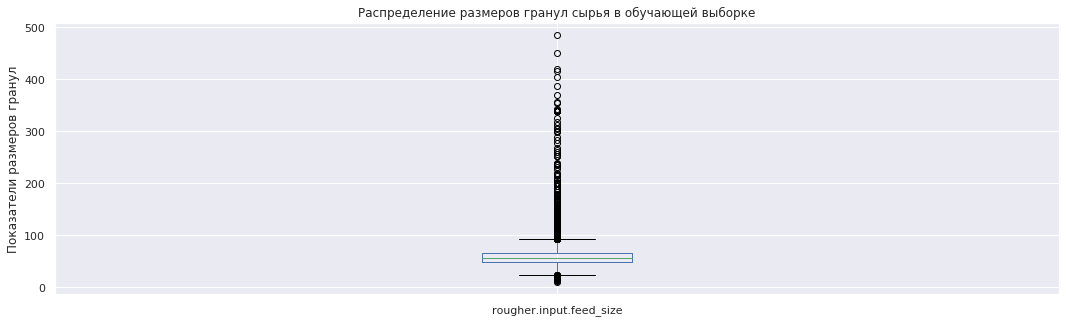

In [15]:

data_train.boxplot(column='rougher.input.feed_size', return_type='axes');
plt.title("Распределение размеров гранул сырья в обучающей выборке")

plt.ylabel("Показатели размеров гранул")
plt.show()

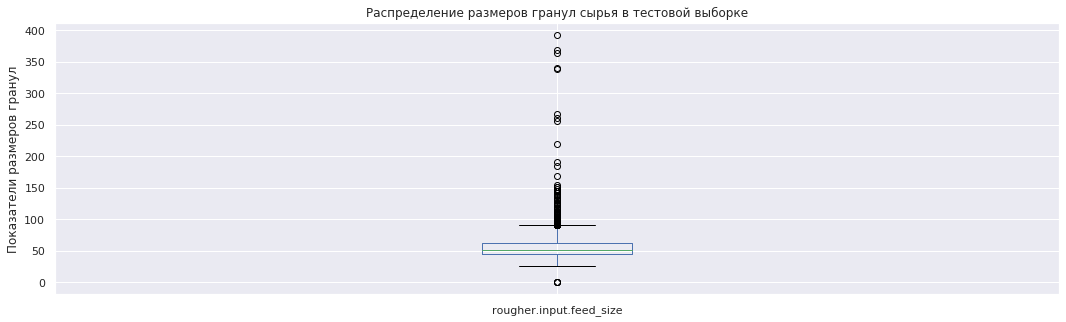

In [16]:
data_test.boxplot(column='rougher.input.feed_size', return_type='axes');
plt.title("Распределение размеров гранул сырья в тестовой выборке")

plt.ylabel("Показатели размеров гранул")
plt.show()

Основные четверти на графиках похожи, отличие в выбросных данных. Предполагаем, что оценка модели будет корректной

Сравним средние размеры частиц в обучающей и тестовой выборках

In [17]:
print("Средний размер частиц выборки train:", data_train['rougher.input.feed_size'].mean())
print("Средний размер частиц выборки test:", data_test['rougher.input.feed_size'].mean())

Средний размер частиц выборки train: 60.09790289839952
Средний размер частиц выборки test: 55.95283531239522


Видим, что средние размеры частиц в обучающей выборке приблизительно схожи со средними размерами  частиц в тестовой. Отличия незначительны.

Теперь посмотрим на суммарные концентрации веществ в разных стадиях очистки. Для этого построим три новых столбца для разных стадий обработки в датасете full.

In [18]:
data_full['input_concentration'] = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] +\
                                data_full['rougher.input.feed_sol'] + data_full['rougher.input.feed_au']
data_full['rougher_concentration'] = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] +\
                                data_full ['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']
data_full['final_concentration'] = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] +\
                                data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au']

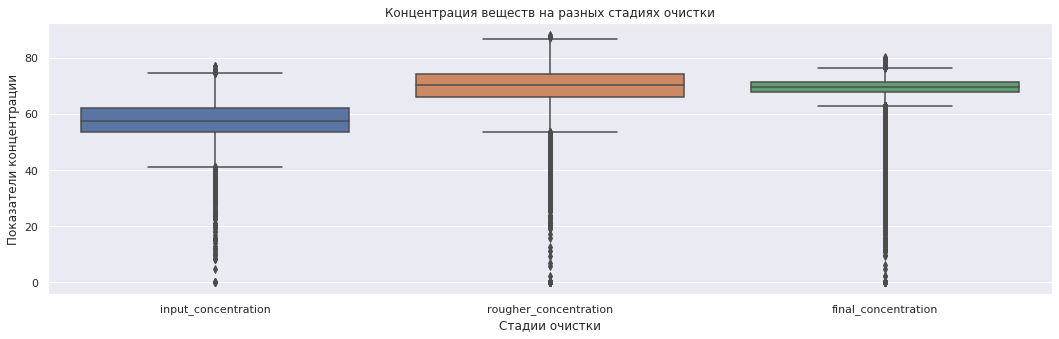

In [19]:
general_concentration = data_full[['input_concentration', 'rougher_concentration', 'final_concentration']]
sns.boxplot(x="variable", y="value", data=pd.melt(general_concentration))
sns.set(rc={'figure.figsize':(18,5)})
plt.title("Концентрация веществ на разных стадиях очистки")
plt.xlabel("Стадии очистки")
plt.ylabel("Показатели концентрации")
plt.show()

Видим, что к финальной стадии показатели немного возрастают. Также на графиках можно увидеть выбросы около нуля. Возможно, это вызвано ошибками в работе оборудования. Скорее всего, такие выбросы нужно удалить.

Создадим словарь значений для удаления и перезапишем по нему значения в трех датасетах:

In [20]:
print(data_full.shape)
print(data_train.shape)
print(data_test.shape)

(19439, 89)
(14149, 52)
(5290, 52)


In [21]:
to_delete =data_full[(data_full['input_concentration']<30)|(data_full['rougher_concentration']<30)|(data_full['rougher_concentration']<30)]

data_full = data_full[~data_full.index.isin(to_delete.index)]
print(data_full.shape)

data_train = data_train[~data_train.index.isin(to_delete.index)]
print(data_train.shape)

data_test = data_test[~data_test.index.isin(to_delete.index)]
print(data_test.shape)

(18933, 89)
(13761, 52)
(5172, 52)


Были проведены исследования изменения концентраций металлов на разных стадиях очистки и выявлено, что концентрация золота неизменно растет от стадии к стадии, а концентрация остальных металлов падает после флотации.

Исследование размеров гранул сырья показало, что их распределение и средние размеры не отличаются значительно друг от друга и оценка моделей будет проведена корректно.

Оценив распределение суммарной концентрации веществ на всех стадиях очистки мы видим, что концентрация золота повышается к финальной очистке. 
Выявленные околонулевые значения концентрации металлов было решено удалить


## Модель

Напишем функции для построения sMAPE и итогового sMAPE

In [22]:
def smape (target, predictions):
    result = ((1/len(target)) * np.sum((2 * np.abs(target - predictions) / (np.abs(target) + np.abs(predictions))))) * 100
    return result

def general_smape(smape_rougher, smape_final):
    
    result = 0.25 * smape_rougher + 0.75 * smape_final
    return result

Добавим целевые признаки 'rougher.output.recovery' и 'final.output.recovery' в обучающую и тестовую выборки по индексу

In [23]:
rougher_recovery = data_full['rougher.output.recovery'] 

data_train = data_train.merge(rougher_recovery , left_index=True, right_index=True)
data_train.info()
data_test = data_test.merge(rougher_recovery , left_index=True, right_index=True)

final_recovery = data_full['final.output.recovery'] 

data_train = data_train.merge(final_recovery , left_index=True, right_index=True)

data_test = data_test.merge(final_recovery , left_index=True, right_index=True)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13761 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 53 columns):
primary_cleaner.input.sulfate                 13761 non-null float64
primary_cleaner.input.depressant              13761 non-null float64
primary_cleaner.input.feed_size               13761 non-null float64
primary_cleaner.input.xanthate                13761 non-null float64
primary_cleaner.state.floatbank8_a_air        13761 non-null float64
primary_cleaner.state.floatbank8_a_level      13761 non-null float64
primary_cleaner.state.floatbank8_b_air        13761 non-null float64
primary_cleaner.state.floatbank8_b_level      13761 non-null float64
primary_cleaner.state.floatbank8_c_air        13761 non-null float64
primary_cleaner.state.floatbank8_c_level      13761 non-null float64
primary_cleaner.state.floatbank8_d_air        13761 non-null float64
primary_cleaner.state.floatbank8_d_level      13761 non-null float64
rougher.input.feed_ag               

Теперь создадим выборки и разделим на них датасеты


In [24]:
features_train = data_train.drop({'rougher.output.recovery', 'final.output.recovery'}, axis=1)
target_rougher_train = data_train['rougher.output.recovery']

target_final_train = data_train['final.output.recovery']

features_test = data_test.drop({'rougher.output.recovery', 'final.output.recovery'}, axis=1)
target_rougher_test = data_test['rougher.output.recovery']

target_final_test = data_test['final.output.recovery']

print('features_train: ', features_train.shape)
print('target_rougher_train :  ', target_rougher_train .shape)
print('target_final_train :  ', target_rougher_train .shape)

print('features_test: ', features_test.shape)
print('target_rougher_test :  ', target_rougher_test.shape)
print('target_final_test:  ', target_rougher_test.shape)

features_train:  (13761, 52)
target_rougher_train :   (13761,)
target_final_train :   (13761,)
features_test:  (5172, 52)
target_rougher_test :   (5172,)
target_final_test:   (5172,)


Масштабируем признаки для обучения моделей:

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Займемся обучением. Обычно рекомендуется начинать с простых, интерпретируемых моделей, таких как линейная регрессия, и если результаты будут неудовлетворительными, то переходить к более сложным, но обычно более точным методам.

Линейная регрессия - одна из простых моделей. У нее нет гиперпараметров. Для решения задачи мы ввели новую метрику качества — sMAPE. Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных, и одинаково учитывает масштаб и целевого признака, и предсказания. Линейная регрессия склонна к переобучению.

In [26]:
linear_rougher = LinearRegression()

smape_linear_rougher = cross_val_score(linear_rougher, features_train, target_rougher_train,\
                                        scoring = make_scorer(smape, greater_is_better=False), cv = 20).mean()
linear_final = LinearRegression()

smape_linear_final = cross_val_score(linear_final, features_train, target_final_train,\
                                        scoring = make_scorer(smape, greater_is_better=False), cv = 20).mean()


In [27]:
print('sMAPE rougher', smape_linear_rougher)
print('sMAPE final', smape_linear_final)
print('sMAPE_general', general_smape(smape_linear_rougher, smape_linear_final))

sMAPE rougher -5.852222022040117
sMAPE final -10.489086775774288
sMAPE_general -9.329870587340745


Среднее отклонение предсказания модели от целевого признака - всего 9.32%. Попробуем улучшить эти результаты на модели посложнее.

Для более сложной модели была выбрана модель Случайного леса. 
В плюсах такой модели то, что она имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; практически не чувствительна к выбросам в данных из-за случайного сэмлирования, не чувствительна к масштабированию  значений признаков, не требует тщательной настройки параметров, хорошо работает «из коробки»; способна эффективно обрабатывать данные с большим числом признаков и классов, редко переобучается, хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущена. 
Минусы модели Случайный лес в том, что случайный лес не умеет экстраполировать, в отличие от той же линейной регрессии (но это можно считать и плюсом, так как не будет экстремальных значений в случае попадания выброса), алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных, больший размер получающихся моделей. 

Подберем сразу гиперпараметры для модели. Управляя гиперпараметром, мы влияем на результаты работы модели, меняя баланс между её недообучением и переобучением. 
Трудность выбора правильных гиперпараметров заключается в том, что для каждой задачи будет уникальный оптимальный набор. Поэтому единственный способ выбрать наилучшие настройки — попробовать разные комбинации на новом датасете. Для этого используем инструмент GridSearchCV

In [28]:
forest_rougher = RandomForestRegressor(random_state=12345)
parameters = { 'n_estimators': range (1, 20),
              'max_depth': range (1, 10) }


grid = GridSearchCV(forest_rougher, parameters, cv=5, scoring=make_scorer(smape, greater_is_better=False),\
                    verbose=3, n_jobs=-1, refit=True)
grid.fit(features_train, target_rougher_train)

print(grid.best_params_)

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ....... max_depth=1, n_estimators=1, score=-11.580, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=1, score=-7.624, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-6.262, total=   0.2s
[CV] max_depth=1, n_estimators=1 .....................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=1, score=-6.512, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-8.925, total=   0.1s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ........ max_depth=1, n_estimators=2, score=-9.475, total=   0.2s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ........ max_depth=1, n_estimators=2, score=-7.512, total=   0.2s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ........ max_depth=1, n_estimators=2, score=-6.216, total=   0.3s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ........ max_depth=1, n_estimators=2, score=-6.583, total=   0.2s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ........ max_depth=1, n_estimators=2, score=-8.963, total=   0.2s
[CV] max_depth=1, n_estimators=3 .....................................
[CV] .

[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed: 32.7min finished


{'max_depth': 4, 'n_estimators': 6}


Наиболее подходящие параметры: {'max_depth': 4, 'n_estimators': 6}

In [29]:
forest_rougher = RandomForestRegressor(random_state=12345, n_estimators=6, \
                                       max_depth=4, verbose=3, n_jobs=-1).fit(features_train, target_rougher_train)

smape_forest_rougher = cross_val_score(forest_rougher, features_train, target_rougher_train,\
                                      scoring = make_scorer(smape, greater_is_better=False), cv = 5).mean()
print(smape_forest_rougher)

building tree 1 of 6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
-6.3982436599836845


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


Подберем параметры для случайного леса и проверим их на модели.

In [30]:
forest_final = RandomForestRegressor(random_state=12345)
parameters = { 'n_estimators': range (1, 20),
              'max_depth': range (1, 10) }


grid = GridSearchCV(forest_final, parameters, cv=5, scoring=make_scorer(smape, greater_is_better=False),\
                    verbose=3, n_jobs=-1, refit=True)
grid.fit(features_train, target_final_train)

print(grid.best_params_)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-9.844, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ........ max_depth=1, n_estimators=1, score=-9.228, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ....... max_depth=1, n_estimators=1, score=-11.254, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ....... max_depth=1, n_estimators=1, score=-11.278, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ....... max_depth=1, n_estimators=1, score=-11.419, total=   0.1s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ....... max_depth=1, n_estimators=2, score=-10.205, total=   0.1s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ........ 

[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed: 29.5min finished


{'max_depth': 7, 'n_estimators': 5}


Наиболее подходящие параметры: {'max_depth': 7, 'n_estimators': 5}

In [31]:
forest_final = RandomForestRegressor(random_state=12345, n_estimators=5, \
                                       max_depth=7, verbose=3, n_jobs=-1).fit(features_train, target_rougher_train)

smape_forest_final = cross_val_score(forest_final, features_train, target_final_train,\
                                      scoring = make_scorer(smape, greater_is_better=False), cv = 5).mean()
print(smape_forest_final)

building tree 1 of 5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
-9.732225107749713


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [32]:
print('sMAPE forest', smape_forest_rougher)
print('sMAPE final', smape_forest_final)
print('sMAPE_general', general_smape(smape_forest_rougher, smape_forest_final))

sMAPE forest -6.3982436599836845
sMAPE final -9.732225107749713
sMAPE_general -8.898729745808206


Согласно оценке моделей, Random forest показывает  результат немного лучше, чем линейная регрессия. Протестируем выбранную модель с подобранными гиперпараметрами на тестовой выборке

In [33]:
forest_rougher = RandomForestRegressor(random_state=12345, n_estimators=6, \
                                       max_depth=4, verbose=3, n_jobs=-1).fit(features_test, target_rougher_test)

smape_forest_rougher = cross_val_score(forest_rougher, features_test, target_rougher_test,\
                                      scoring = make_scorer(smape, greater_is_better=False), cv = 5).mean()
print(smape_forest_rougher)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6
building tree 3 of 6


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 6
building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
-4.081595159792927


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


In [34]:
forest_final = RandomForestRegressor(random_state=12345, n_estimators=6, \
                                       max_depth=4, verbose=3, n_jobs=-1).fit(features_test, target_final_test)

smape_forest_final = cross_val_score(forest_rougher, features_test, target_final_test,\
                                      scoring = make_scorer(smape, greater_is_better=False), cv = 5).mean()
print(smape_forest_final)

building tree 1 of 6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6
building tree 2 of 6
building tree 3 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6
building tree 2 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
building tree 1 of 6


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6
-10.546737498593503


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


In [35]:
print('sMAPE forest', smape_forest_rougher)
print('sMAPE final', smape_forest_final)
print('sMAPE_general', general_smape(smape_forest_rougher, smape_forest_final))

sMAPE forest -4.081595159792927
sMAPE final -10.546737498593503
sMAPE_general -8.930451913893359


## Вывод

Были загружены три датасета, содержащие общие данные и данные для обучающей и тестовой выборок. Была проверена корректность расчета эффективности, и доказано, что она рассчитана верно. После первичного осмотра датасетов были найдено, что они содержат пропуски. Было решено заполнить их методом интерполяции, на основе данных предыдущей и последующей ячейки. 

В тестовой выборке отсутствовали данные, обозначающие результат обработки(output) и расчеты концентраций металлов. Эти признаки не нужны для обучения моделей.
В обучающей выборке были удалены данные, отсутствующие в тестовой, чтобы привести выборки в соответствие. 

Были проведены исследования изменения концентраций металлов на разных стадиях очистки и выявлено, что концентрация золота неизменно растет от стадии к стадии, а концентрация остальных металлов падает после флотации.

Исследование размеров гранул сырья показало, что их распределение не отличается значительно друг от друга и оценка моделей будет проведена корректно.

Оценив распределение суммарной концентрации веществ на всех стадиях очистки мы видим, что концентрация золота повышается к финальной очистке.

Для оценки моделей была написана функция  sMAPE с помощью которой оценены модели на основе линейной регрессии и случайного леса. Проведенный подбор параметров помог добиться от модели случайного леса результата -8.93%